# Dog Breed Classification 🐶

Multi-class image classification of  dog breeds using TensorFlow 2.0. and TensorFlow Hub.


## 1. Problem
Identify the breed of a dog from the given image.

## 2. Data
Data source: https://www.kaggle.com/c/dog-breed-identification/overview/description
## 3. Evaluation
For each image in the test set, you must predict a probability for each of the different breeds.


Source: https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
## 4. Features
* Unstructured data.
* There are 120 breeds of dogs in the data set.
* 10,000+ images included in the training set.
* 10,000+ images included in the test set.

**Unzip the data.**

In [5]:
# !unzip "/content/drive/MyDrive/Dog-Breed-Classification/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog-Breed-Classification/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/drive/MyDrive/Dog-Breed-Classification/train/83fad0718581a696132c96c166472627.j

**Prepare Workspace**

✅  Import TensorFlow

✅  Import TensorFlow_Hub

✅  Set Runtime to use GPU

In [2]:
# Import TensorFlow
import tensorflow as tf
import tensorflow_hub as hub

**Accessing the Data**

In [10]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Overview of labels
dog_labels = pd.read_csv('/content/drive/MyDrive/Dog-Breed-Classification/labels.csv')

In [4]:
# Overview of overall Data
dog_labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,abd43fd42eee6c32c7d95fc0993603b6,scottish_deerhound
freq,1,126


In [5]:
# Overview of first 5 data
dog_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


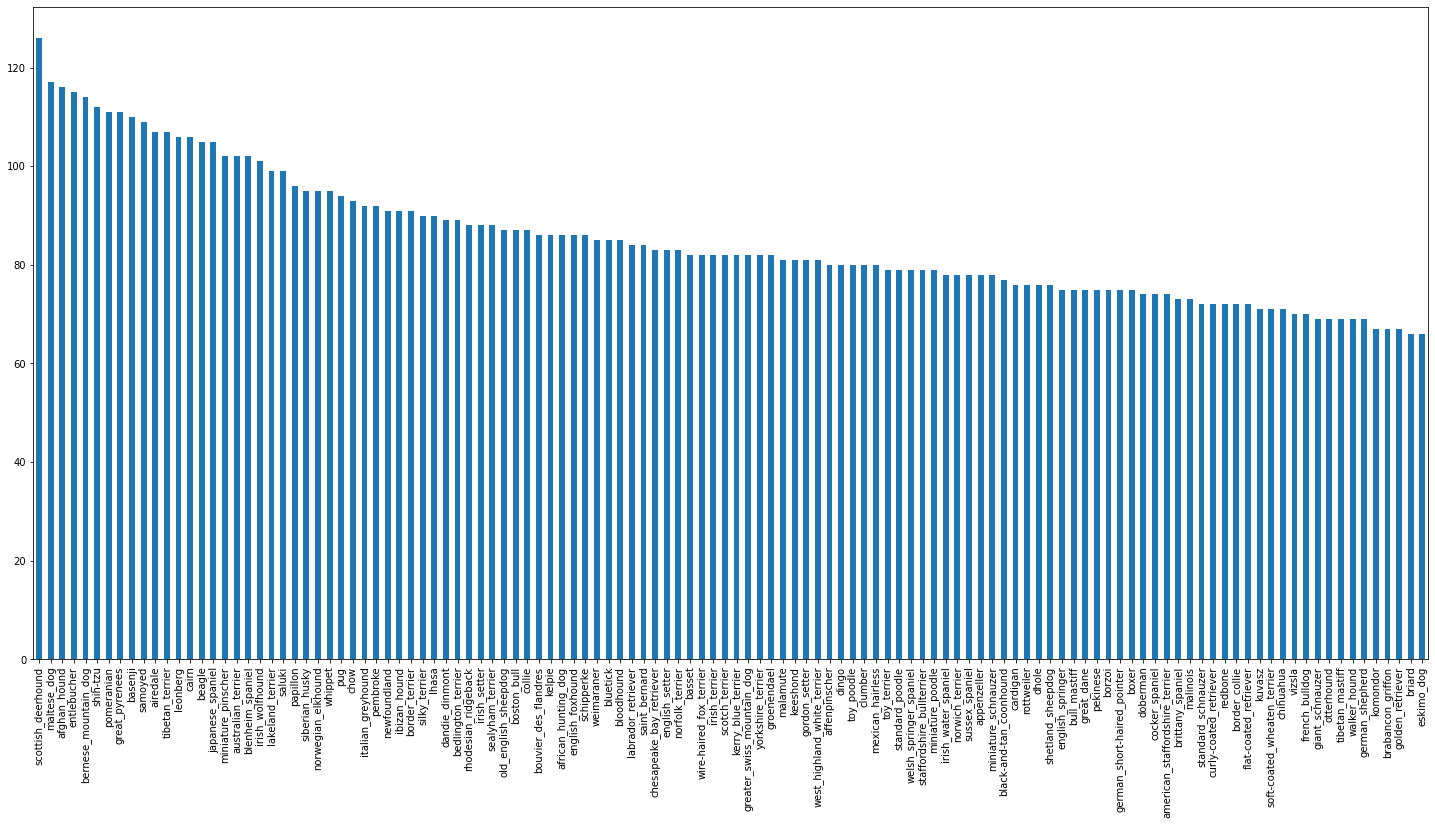

In [6]:
# How many images of each breed is available?
dog_labels["breed"].value_counts().plot.bar(figsize=(25, 12));

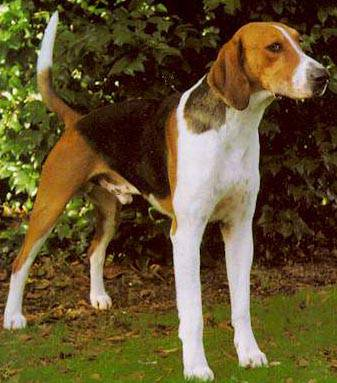

In [1]:
# View an image from the directory
from IPython.display import Image
Image("drive/My Drive/Dog-Breed-Classification/train/ffca1c97cea5fada05b8646998a5b788.jpg")

**Display image path names**

In [7]:
# Create path names from image ID's
train_img_path_names = ["drive/My Drive/Data/train/" + fname + ".jpg" for fname in dog_labels['id']]

# Overview of first 10
train_img_path_names[:10]

['drive/My Drive/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
# Compare number of path names to number of actual images.
import os

# Count of jpg files in the drive directory
print(f"Total JPG: {len(os.listdir('drive/My Drive/Dog-Breed-Classification/train/'))}")
# Count of path names
print(f"Total Path Names: {len(train_img_path_names)}")

Total JPG: 10222
Total Path Names: 10222


**Prepare the Labels**

In [11]:
# Import library
import numpy as np
dbreeds = dog_labels["breed"]

# Convert dbreeds to array
dbreeds = np.array(dbreeds)
# Check result
dbreeds

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
# List of unique labels
ubreeds = np.unique(dbreeds)
ubreeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [14]:
# Count unique breeds
len(ubreeds)

120

In [15]:
# Turn labels into array of booleans
boobreeds = [label == ubreeds for label in dbreeds]
boobreeds[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
# Count
len(boobreeds)

10222

In [18]:
# Convert boolean aarray into integer
boobreeds[0].astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
#TODO Create validation set